In [169]:
import pandas as pd

train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

In [170]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [171]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [172]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [173]:
# 官方解釋1是頭等艙，2是二等艙，3是三等艙
pclass_num_of_Survivors = train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
pclass_num_of_Survivors

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


([<matplotlib.axis.XTick at 0x29aada0a0>,
 [Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

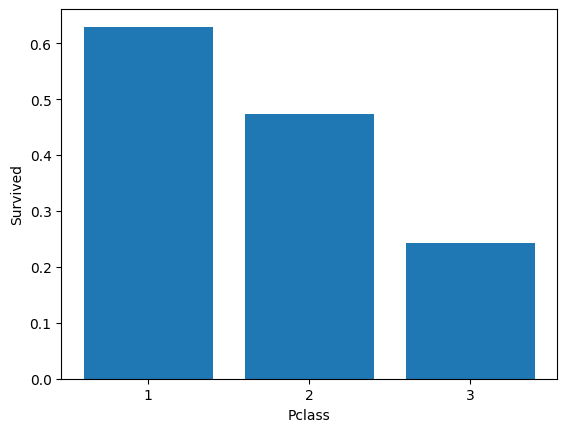

In [174]:
import matplotlib.pyplot as plt

plt.bar(pclass_num_of_Survivors['Pclass'], pclass_num_of_Survivors['Survived'])
plt.xlabel('Pclass')
plt.ylabel('Survived')
plt.xticks(pclass_num_of_Survivors['Pclass'])

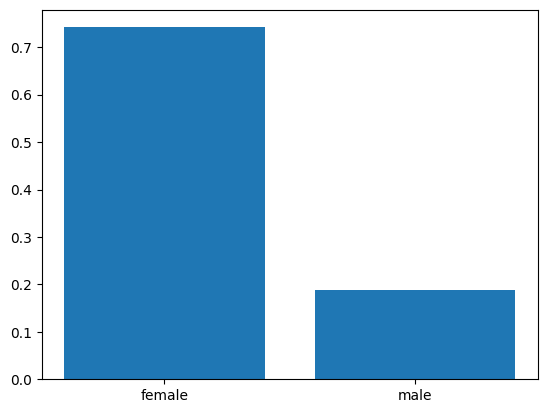

In [175]:
sex_num_of_Survivors = train_data[['Sex', 'Survived']].groupby('Sex', as_index=False).mean().sort_values(by='Survived', ascending=False)
sex_num_of_Survivors
plt.bar(sex_num_of_Survivors['Sex'], sex_num_of_Survivors['Survived'])
plt.show()

<Axes: >

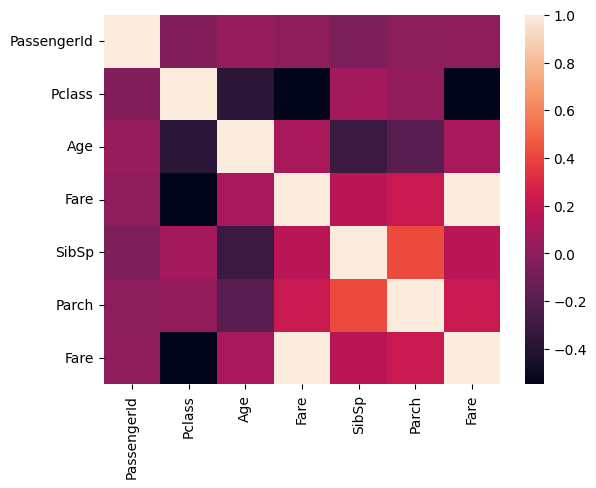

In [176]:
import seaborn as sns

numfeatures = ['PassengerId', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch', 'Fare']
sns.heatmap(train_data[numfeatures].corr())

In [177]:
train_data_drop = train_data.copy()
train_data_drop.dropna(subset=['Age'], inplace=True)
train_data_drop

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [178]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

features = ['PassengerId', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch', 'Fare']
X = train_data_drop[features]
y = train_data_drop['Survived']

In [179]:
def standScaler(data):
    st = StandardScaler()
    X_std = st.fit_transform(data)
    return X_std

def trainModel(model, X_train, y_train, X_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

In [180]:
X_std= standScaler(X)
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2)
model = DecisionTreeClassifier(random_state=0)
y_hat = trainModel(model, X_train, y_train, X_test)

print('直接刪掉空值 Accuarcy: ', accuracy_score(y_hat, y_test))

直接刪掉空值 Accuarcy:  0.7062937062937062


In [181]:
train_data_median = train_data.copy()
train_data_median['Age'] = train_data_median['Age'].fillna(train_data['Age'].median())
train_data_median

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [182]:
X = train_data_median[features]
y = train_data_median['Survived']

X_std = standScaler(X)
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=0)
model = DecisionTreeClassifier(random_state=0)
y_hat = trainModel(model, X_train, y_train, X_test)

print('用中位數填空值 Accuarcy: ', accuracy_score(y_hat, y_test))

用中位數填空值 Accuarcy:  0.7150837988826816


In [183]:
# 選定用中位數處理Age缺失值部分
train_data = train_data_median
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [184]:
train_data['Sex'].replace({'male':1, 'female':0}, inplace=True)

features = ['PassengerId', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch', 'Fare']
X = train_data[features]
y = train_data['Survived']

X_std = standScaler(X)
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=0)

In [185]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
y_hat = trainModel(model, X_train, y_train, X_test)
print('KNN Accuarcy: ', accuracy_score(y_hat, y_test))

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=0)
y_hat = trainModel(model, X_train, y_train, X_test)
print('DecisionTree Accuarcy: ', accuracy_score(y_hat, y_test))

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=0)
y_hat = trainModel(model, X_train, y_train, X_test)
print('RandomForestClassifier Accuarcy:', accuracy_score(y_hat, y_test))

from sklearn.neural_network import MLPClassifier
model = MLPClassifier(random_state=0)
y_hat = trainModel(model, X_train, y_train, X_test)
print('MLPClassifier Accuarcy:', accuracy_score(y_hat, y_test))

from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(random_state=0)
y_hat = trainModel(model, X_train, y_train, X_test)
print('AdaBoostClassifier Accuarcy:', accuracy_score(y_hat, y_test))

KNN Accuarcy:  0.7430167597765364
DecisionTree Accuarcy:  0.7150837988826816
RandomForestClassifier Accuarcy: 0.7541899441340782
MLPClassifier Accuarcy: 0.7430167597765364
AdaBoostClassifier Accuarcy: 0.7430167597765364


/Users/rich/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [186]:
for n_estimator in range(10, 100, 10):
    model = RandomForestClassifier(n_estimators=n_estimator, random_state=0)
    y_hat = trainModel(model, X_train, y_train, X_test)
    print('n_estimator:', n_estimator, 'Accuarcy:', accuracy_score(y_hat, y_test))

n_estimator: 10 Accuarcy: 0.7150837988826816
n_estimator: 20 Accuarcy: 0.7597765363128491
n_estimator: 30 Accuarcy: 0.7541899441340782
n_estimator: 40 Accuarcy: 0.7597765363128491
n_estimator: 50 Accuarcy: 0.7653631284916201
n_estimator: 60 Accuarcy: 0.770949720670391
n_estimator: 70 Accuarcy: 0.7597765363128491
n_estimator: 80 Accuarcy: 0.7541899441340782
n_estimator: 90 Accuarcy: 0.7541899441340782


In [187]:
model = RandomForestClassifier(n_estimators=60, random_state=0)
X_std = standScaler(X)
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=0)
y_hat = trainModel(model, X_train, y_train, X_test)
print('RandomForestClassifier Accuarcy:', accuracy_score(y_hat, y_test))

RandomForestClassifier Accuarcy: 0.770949720670391


AUC:  0.8048748353096179


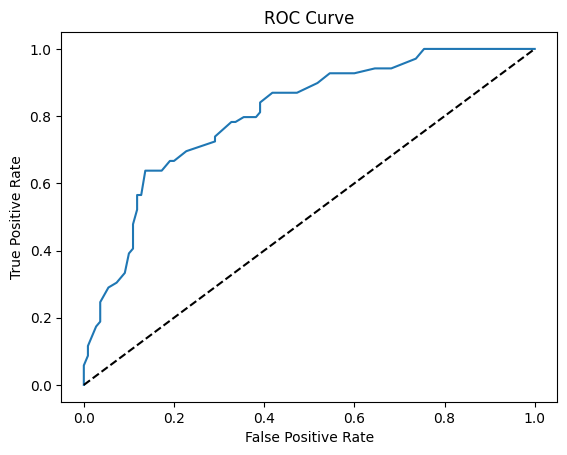

In [188]:
from sklearn.metrics import roc_curve, auc
y_score = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_score)
print('AUC: ', auc(fpr, tpr))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()